# Manipulating DataFrames with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from jupyterthemes import jtplot

jtplot.style()
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Chapter 1. Extracting and transforming data

## 1. Indexing DataFrames

### A simple DataFrame

In [2]:
df = pd.read_csv('Manipulating_DataFrames_with_Pandas/sales.csv', index_col='month')
df

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


### Indexing using square brackets

In [3]:
df['salt']['Jan'] 

12.0

### Using column a!ribute and row label

In [4]:
df.eggs['Mar']

221

### Using the `.loc` accessor

In [5]:
 df.loc['May', 'spam'] 

52

### Using the `.iloc` accessor

In [6]:
 df.iloc[4, 2] 

52

### Selecting only some columns

In [7]:
df_new = df[['salt','eggs']]
df_new

,salt,eggs
month,,
Jan,12.0,47
Feb,50.0,110
Mar,89.0,221
Apr,87.0,77
May,NaN,132
Jun,60.0,205


### №1 Index ordering

*Select `'Bedford'` county and the `'winner'` column. Which method is the preferred way?*

* `election['Bedford', 'winner']`
* `election['Bedford']['winner']`
* `election['eggs']['Bedford']`
* *`election.loc['Bedford', 'winner']`*
* `election.iloc['Bedford', 'winner']`

In [8]:
election = pd.read_csv('Manipulating_DataFrames_with_Pandas/pennsylvania2012_turnout.csv', index_col='county')
election.loc['Bedford', 'winner']

'Romney'

### №2 Positional and labeled indexing

* Explore the DataFrame in the IPython Shell using `election.head()`
* Assign the row position of `election.loc['Bedford']` to x`
* Assign the column position of `election['winner']` to y`
* Print the boolean equivalence of the `.loc` and `.iloc` selections

In [9]:
x = 4
y = 4

print(election.iloc[x, y] == election.loc['Bedford', 'winner'])

True


### №3 Indexing and column rearrangement

* Read in filename using `pd.read_csv()` and set the index to `'county'` by specifying the `index_col` parameter
* Create a separate DataFrame `results` with the columns `['winner', 'total', 'voters']`
* Print the output using `results.head()`

In [10]:
filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650' + \
            '/datasets/pennsylvania2012.csv'

election = pd.read_csv(filename, index_col='county')

results = election[['winner', 'total', 'voters']]
print(results.head())

           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


## 2. Slicing DataFrames

### Sales DataFrmae

In [11]:
df

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


### Selecting a column (i.e., Series)

In [12]:
df['eggs']

month
Jan     47
Feb    110
Mar    221
Apr     77
May    132
Jun    205
Name: eggs, dtype: int64

In [13]:
type(df['eggs'])

pandas.core.series.Series

### Slicing and indexing a Series

In [14]:
df['eggs'][1:4] 

month
Feb    110
Mar    221
Apr     77
Name: eggs, dtype: int64

In [15]:
df['eggs'][4]

132

### Using `.loc[]` (1)

In [16]:
df.loc[:, 'eggs':'salt'] 

,eggs,salt
month,,
Jan,47,12.0
Feb,110,50.0
Mar,221,89.0
Apr,77,87.0
May,132,NaN
Jun,205,60.0


### Using `.loc[]` (2)

In [17]:
df.loc['Jan':'Apr',:]

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20


### Using `.loc[]` (3)

In [18]:
df.loc['Mar':'May', 'salt':'spam']

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


### Using `.iloc[]`

In [19]:
df.iloc[2:5, 1:]

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


### Using lists rather than slices (1)

In [20]:
df.loc['Jan':'May', ['eggs', 'spam']] 

,eggs,spam
month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52


### Using lists rather than slices (2)

In [21]:
df.iloc[[0,4,5], 0:2]

,eggs,salt
month,,
Jan,47,12.0
May,132,NaN
Jun,205,60.0


### Series versus 1-column DataFrame

In [22]:
df['eggs']

month
Jan     47
Feb    110
Mar    221
Apr     77
May    132
Jun    205
Name: eggs, dtype: int64

In [23]:
type(df['eggs'])

pandas.core.series.Series

In [24]:
df[['eggs']] 

,eggs
month,
Jan,47
Feb,110
Mar,221
Apr,77
May,132
Jun,205


In [25]:
type(df[['eggs']] )

pandas.core.frame.DataFrame

### №4 Slicing rows

* Slice the row labels `'Perry'` to `'Potter'` and assign the output to `p_counties`
* Print the `p_counties` DataFrame. This has been done for you
* Slice the row labels `'Potter'` to `'Perry'` in reverse order. To do this for hypothetical row labels `'a'` and `'b'`, you could use a stepsize of `-1` like so: `df.loc['b':'a':-1]`
* Print the `p_counties_rev` DataFrame

In [26]:
p_counties = election.loc['Perry':'Potter']
print(p_counties)
print()
p_counties_rev = election.loc['Potter':'Perry':-1]
print(p_counties_rev)

             state   total      Obama     Romney  winner   voters
county                                                           
Perry           PA   18240  29.769737  68.591009  Romney    27245
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197
Pike            PA   23164  43.904334  54.882576  Romney    41840
Potter          PA    7205  26.259542  72.158223  Romney    10913

             state   total      Obama     Romney  winner   voters
county                                                           
Potter          PA    7205  26.259542  72.158223  Romney    10913
Pike            PA   23164  43.904334  54.882576  Romney    41840
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197
Perry           PA   18240  29.769737  68.591009  Romney    27245


### №5 Slicing columns

* Slice the columns from the starting column to `'Obama'` and assign the result to `left_columns`
* Slice the columns from `'Obama'` to `'winner'` and assign the result to `middle_columns`
* Slice the columns from `'Romney'` to the end and assign the result to `right_columns`
* The code to print the first 5 rows of `left_columns`, `middle_columns`, and `right_columns`

In [27]:
left_columns = election.loc[:, :'Obama']
print(left_columns.head())
print()
middle_columns = election.loc[:, 'Obama':'winner']
print(middle_columns.head())
print()
right_columns = election.loc[:, 'Romney':]
print(right_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452

               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney

              Romney  winner  voters
county                              
Adams      63.112001  Romney   61156
Allegheny  42.185820   Obama  924351
Armstrong  67.901278  Romney   42147
Beaver     52.637630  Romney  115157
Bedford    76.986570  Romney   32189


### №6 Subselecting DataFrames with lists

* Create the list of row labels `['Philadelphia', 'Centre', 'Fulton']` and assign it to `rows`
* Create the list of column labels `['winner', 'Obama', 'Romney']` and assign it to `cols`
* Create a new DataFrame by selecting with `rows` and `cols` in `.loc[]` and assign it to `three_counties`
* Print the `three_counties` DataFrame

In [28]:
rows = ['Philadelphia', 'Centre', 'Fulton']
cols = ['winner', 'Obama', 'Romney']

three_counties = election.loc[rows, cols]
print(three_counties)

              winner      Obama     Romney
county                                    
Philadelphia   Obama  85.224251  14.051451
Centre        Romney  48.948416  48.977486
Fulton        Romney  21.096291  77.748861


## 3. Filtering DataFrames

### Creating a Boolean Series

In [29]:
df.salt > 60

month
Jan    False
Feb    False
Mar     True
Apr     True
May    False
Jun    False
Name: salt, dtype: bool

### Filtering with a Boolean Series

In [30]:
df[df.salt > 60]

,eggs,salt,spam
month,,,
Mar,221,89.0,72
Apr,77,87.0,20


In [31]:
enough_salt_sold = df.salt > 60
df[enough_salt_sold]

,eggs,salt,spam
month,,,
Mar,221,89.0,72
Apr,77,87.0,20


### Combining filters

In [32]:
df[(df.salt >= 50) & (df.eggs < 200)]

,eggs,salt,spam
month,,,
Feb,110,50.0,31
Apr,77,87.0,20


In [33]:
df[(df.salt >= 50) | (df.eggs < 200)]

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


### DataFrames with zeros and NaNs

In [34]:
df2 = df.copy()
df2['bacon'] = [0, 0, 50, 60, 70, 80]
df2

,eggs,salt,spam,bacon
month,,,,
Jan,47,12.0,17,0
Feb,110,50.0,31,0
Mar,221,89.0,72,50
Apr,77,87.0,20,60
May,132,NaN,52,70
Jun,205,60.0,55,80


### Select columns with all nonzeros

In [35]:
df2.loc[:, df2.all()]

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


### Select columns with any nonzeros

In [36]:
df2.loc[:, df2.any()]

,eggs,salt,spam,bacon
month,,,,
Jan,47,12.0,17,0
Feb,110,50.0,31,0
Mar,221,89.0,72,50
Apr,77,87.0,20,60
May,132,NaN,52,70
Jun,205,60.0,55,80


### Select columns with any NaNs

In [37]:
df.loc[:, df.isnull().any()]

,salt
month,
Jan,12.0
Feb,50.0
Mar,89.0
Apr,87.0
May,NaN
Jun,60.0


### Select columns without NaNs

In [38]:
df.loc[:, df.notnull().all()]

,eggs,spam
month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52
Jun,205,55


### Drop rows with any NaNs

In [39]:
df.dropna(how='any')

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
Jun,205,60.0,55


### Filtering a column based on another

In [40]:
df.eggs[df.salt > 55]

month
Mar    221
Apr     77
Jun    205
Name: eggs, dtype: int64

### Modifying a column based on another

In [41]:
df.eggs[df.salt > 55] += 5
df

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,226,89.0,72
Apr,82,87.0,20
May,132,NaN,52
Jun,210,60.0,55


### №7 Thresholding data

* Create a boolean array of the condition where the `'turnout'` column is greater than `70` and assign it to `high_turnout`
* Filter the election DataFrame with the `high_turnout` array and assign it to `high_turnout_df`
* Print the filtered DataFrame

In [42]:
election = pd.read_csv('Manipulating_DataFrames_with_Pandas/pennsylvania2012_turnout.csv',
                       index_col='county')

In [43]:
high_turnout = election['turnout'] > 70

high_turnout_df = election[high_turnout]
print(high_turnout_df)

             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


### №8 Filtering columns using other columns

* Create a boolean array for the condition where the `'margin'` column is less than 1 and assign it to `too_close`
* Convert the entries in the `'winner'` column where the result was too close to call to `np.nan`
* Print the output of `election.info()`

In [44]:
too_close = election['margin'] < 1

election.winner[too_close] = np.nan
print(election.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.7+ KB
None


### №9 Filtering using NaNs

* Select the `'age'` and `'cabin'` columns of `titanic` and create a new DataFrame `df`
* Print the shape of df. This has been done for you
* Drop rows in `df` with `how='any'` and print the shape
* Drop rows in `df` with `how='all'` and print the shape
* Drop columns from the `titanic` DataFrame that have less than 1000 non-missing values by specifying the `thresh` and `axis` keyword arguments. Print the output of `.info()` from this

In [45]:
titanic = pd.read_csv('Manipulating_DataFrames_with_Pandas/titanic.csv')

In [46]:
df = titanic.loc[:,['age', 'cabin']]

print(df.shape)

print(df.dropna(how='any').shape)
print(df.dropna(how='all').shape)

print()
print(titanic.dropna(thresh=1000, axis='columns').info())

(1309, 2)
(272, 2)
(1069, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB
None


## 4. Transforming DataFrames

In [47]:
df = pd.read_csv('Manipulating_DataFrames_with_Pandas/sales.csv', index_col='month')

### DataFrame vectorized methods

In [48]:
# Convert to dozens unit
df.floordiv(12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


### NumPy vectorized functions

In [49]:
np.floor_divide(df, 12)

,eggs,salt,spam
month,,,
Jan,3.0,1.0,1.0
Feb,9.0,4.0,2.0
Mar,18.0,7.0,6.0
Apr,6.0,7.0,1.0
May,11.0,NaN,4.0
Jun,17.0,5.0,4.0


### Plain Python functions (1)

In [50]:
def dozens(n):
    return n//12

In [51]:
df.apply(dozens)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


### Plain Python functions (2)

In [52]:
df.apply(lambda n: n//12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


### Storing a transformation

In [53]:
df['dozens_of_eggs'] = df.eggs.floordiv(12)
df

,eggs,salt,spam,dozens_of_eggs
month,,,,
Jan,47,12.0,17,3
Feb,110,50.0,31,9
Mar,221,89.0,72,18
Apr,77,87.0,20,6
May,132,NaN,52,11
Jun,205,60.0,55,17


### The DataFrame index

In [54]:
df.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], dtype='object', name='month')

### Working with string values (1)

In [55]:
df.index = df.index.str.upper() 
df

,eggs,salt,spam,dozens_of_eggs
month,,,,
JAN,47,12.0,17,3
FEB,110,50.0,31,9
MAR,221,89.0,72,18
APR,77,87.0,20,6
MAY,132,NaN,52,11
JUN,205,60.0,55,17


### Working with string values (2)

In [56]:
df.index = df.index.map(str.lower)
df

,eggs,salt,spam,dozens_of_eggs
month,,,,
jan,47,12.0,17,3
feb,110,50.0,31,9
mar,221,89.0,72,18
apr,77,87.0,20,6
may,132,NaN,52,11
jun,205,60.0,55,17


### Defining columns using other columns

In [57]:
df['salty_eggs'] = df.salt + df.dozens_of_eggs
df

,eggs,salt,spam,dozens_of_eggs,salty_eggs
month,,,,,
jan,47,12.0,17,3,15.0
feb,110,50.0,31,9,59.0
mar,221,89.0,72,18,107.0
apr,77,87.0,20,6,93.0
may,132,NaN,52,11,NaN
jun,205,60.0,55,17,77.0


### №10  Using `apply()` to transform a column

* Apply the `to_celsius()` function over the `['Mean TemperatureF','Mean Dew PointF']` columns of the weather DataFrame
* Reassign the column labels of `df_celsius` to `['Mean TemperatureC','Mean Dew PointC']` using the `.columns` attribute

In [58]:
weather = pd.read_csv('Manipulating_DataFrames_with_Pandas/weather.csv')

In [59]:
def to_celsius(F):
    return 5/9*(F - 32)

df_celsius = weather.loc[:,['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

print(df_celsius.head())

   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


### №11 Using `.map()` with a dictionary

* Create a dictionary with the key:value pairs `'Obama':'blue'` and `'Romney':'red'`
* Use the `.map()` method on the `'winner'` column using the `red_vs_blue` dictionary you created
* Print the output of `election.head()`

In [60]:
red_vs_blue = {'Obama': 'blue', 'Romney': 'red'}

election['color'] = election['winner'].map(red_vs_blue)
print(election.head())

          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


### №12 Using vectorized functions

* Import `zscore` from `scipy.stats`
* Call `zscore` with `election['turnout']` as input
* Print the output of `type(turnout_zscore)`
* Assign `turnout_zscore` to a new column in election as `'turnout_zscore'`
* Print the output of `election.head()`

In [61]:
from scipy.stats import zscore

turnout_zscore = zscore(election['turnout'])
print(type(turnout_zscore))

election['turnout_zscore'] = turnout_zscore
print(election.head())

<class 'numpy.ndarray'>
          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  turnout_zscore  
county                                      
Adams      27.629667   red        0.853734  
Allegheny  14.454399  blue        0.439846  
Armstrong  37.204293   red        0.575650  
Beaver      6.605012   red        1.018647  
Bedford    54.929118   red        0.463391  


## Chapter 2. Advanced indexing

## 5. Index objects and labeled data

### pandas Data Structures

* Key building blocks
    * Indexes: Sequence of labels
    * Series: 1D array with Index
    * DataFrames: 2D array with Series as columns
* Indexes
    * Immutable (Like dictionary keys)
    * Homogenous in data type (Like NumPy arrays)

### Creating a Series

In [62]:
prices = [10.70, 10.86, 10.74, 10.71, 10.79]
shares = pd.Series(prices)
shares

0    10.70
1    10.86
2    10.74
3    10.71
4    10.79
dtype: float64

### Creating an index

In [63]:
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']
shares = pd.Series(prices, index=days)
shares

Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

### Examining an index

In [64]:
shares.index

Index(['Mon', 'Tue', 'Wed', 'Thur', 'Fri'], dtype='object')

In [65]:
shares.index[2]

'Wed'

In [66]:
shares.index[:2]

Index(['Mon', 'Tue'], dtype='object')

In [67]:
shares.index[-2:]

Index(['Thur', 'Fri'], dtype='object')

In [68]:
print(shares.index.name)

None


### Modifying index name

In [69]:
shares.index.name = 'weekday'
shares

weekday
Mon     10.70
Tue     10.86
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

### Modifying index entries

```python
In [66]: shares.index[2] = 'Wednesday'
Out[66]:
```
```
        ---------------------------------------------------------------------------
        TypeError                                 Traceback (most recent call last)
```

```python
In [66]: shares.index[:4] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
Out[66]:
```
```
        ---------------------------------------------------------------------------
        TypeError                                 Traceback (most recent call last)
```

### Modifying all index entries

In [70]:
shares.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
shares

Monday       10.70
Tuesday      10.86
Wednesday    10.74
Thursday     10.71
Friday       10.79
dtype: float64

### Unemployment data

```python
In [19]: unemployment = pd.read_csv('Unemployment.csv')
    
In [20]: unemployment.head()
Out[20]:
```
```
    Zip  unemployment  participants
0  1001          0.06         13801
1  1002          0.09         24551
2  1003          0.17         11477
3  1005          0.10         4086
4  1007          0.05         11362
```

```python
In [21]: unemployment.info()
```
```
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 33120 entries, 0 to 33119
        Data columns (total 3 columns):
        Zip             33120 non-null int64
        unemployment    32556 non-null float64
        particpants     33120 non-null int64
        dtypes: float64(1), int64(2)
        memory usage: 776.3 KB
```

### Assigning the index

```python
In [22]: unemployment.index = unemployment['Zip']
    
In [23]: unemployment.head()
Out[23]:
```
```
               Zip  unemployment  participants
        Zip
        1001  1001          0.06         13801
        1002  1002          0.09         24551
        1003  1003          0.17         11477
        1005  1005          0.10          4086
        1007  1007          0.05         11362
```

### Removing extra column

```python
In [24]: unemployment.head(3)
Out[24]:
```
```
               Zip  unemployment  participants
        Zip
        1001  1001          0.06         13801
        1002  1002          0.09         24551
        1003  1003          0.17         11477
```

```python
In [25]: del unemployment['Zip']
    
In [26]: unemployment.head(3)
Out[26]:
```
```
              unemployment  participants
        Zip
        1001          0.06         13801
        1002          0.09         24551
        1003          0.17         11477
```

### Examining index & columns

```python
In [27]: print(unemployment.index)
```
```
        Int64Index([1001, 1002, 1003, 1005, 1007, 1008, 1009, 1010, 1011, 1012, 966, 968, 969, 971, 976, 979,
                    982, 983, 985, 987], dtype='int64', name='Zip', length=33120)
```
```python
In [28]: print(unemployment.index.name)
        Zip

In [29]: print(type(unemployment.index))
```
```
        <class ‘pandas.indexes.numeric.Int64Index'>
```
```python
In [30]: print(unemployment.columns)
```
```
        Index(['unemployment', 'participants'], dtype='object')
```

### **read_csv()** with `index_col`

```python
In [31]: unemployment = pd.read_csv('Unemployment.csv', index_col='Zip')
    
In [32]: unemployment.head()
Out[32]:
```
```
              unemployment  participants
        Zip
        1001          0.06         13801
        1002          0.09         24551
        1003          0.17         11477
        1005          0.10          4086
        1007          0.05         11362
```

### №13 Index values and names

*Which one of the following index operations does not raise an error?*

* `sales.index[0] = 'JAN'`
* `sales.index[0] = sales.index[0].upper()`
* *`sales.index = range(len(sales))`*

### №14 Changing index of a DataFrame

* Create a list `new_idx` with the same elements as in `sales.index`, but with all characters capitalized
* Assign `new_idx` to `sales.index`
* Print the `sales dataframe

In [71]:
sales = pd.read_csv('Manipulating_DataFrames_with_Pandas/sales.csv', index_col='month')

In [72]:
new_idx = [i.upper() for i in sales.index]

sales.index = new_idx
print(sales)

     eggs  salt  spam
JAN    47  12.0    17
FEB   110  50.0    31
MAR   221  89.0    72
APR    77  87.0    20
MAY   132   NaN    52
JUN   205  60.0    55


### №15 Changing index name labels

* Assign the string `'MONTHS'` to `sales.index.name` to create a name for the index
* Print the `sales` dataframe to see the index name you just created
* Now assign the string `'PRODUCTS'` to `sales.columns.name` to give a name to the set of columns
* Print the `sales` dataframe again to see the columns name you just created

In [73]:
sales.index.name = 'MONTHS'
print(sales)
print()
sales.columns.name = 'PRODUCTS'
print(sales)

        eggs  salt  spam
MONTHS                  
JAN       47  12.0    17
FEB      110  50.0    31
MAR      221  89.0    72
APR       77  87.0    20
MAY      132   NaN    52
JUN      205  60.0    55

PRODUCTS  eggs  salt  spam
MONTHS                    
JAN         47  12.0    17
FEB        110  50.0    31
MAR        221  89.0    72
APR         77  87.0    20
MAY        132   NaN    52
JUN        205  60.0    55


### №16 Building an index, then a DataFrame

* Generate a list `months` with the data `['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']`
* Assign months to `sales.index`
* Print the modified `sales` dataframe and verify that you now have month information in the index

In [74]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

sales.index = months
print(sales)

PRODUCTS  eggs  salt  spam
Jan         47  12.0    17
Feb        110  50.0    31
Mar        221  89.0    72
Apr         77  87.0    20
May        132   NaN    52
Jun        205  60.0    55


## 6. Hierarchical Indexing

### Stock data

In [75]:
stocks = pd.read_csv('Manipulating_DataFrames_with_Pandas/stocks.csv')
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


### Seing index

In [76]:
stocks = stocks.set_index(['Symbol', 'Date'])
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


### MultiIndex on DataFrame

In [77]:
print(stocks.index)
print(stocks.index.name)
print(stocks.index.names)

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[1, 0, 2, 0, 2, 1, 2, 1, 0], [0, 0, 0, 1, 1, 1, 2, 2, 2]],
           names=['Symbol', 'Date'])
None
['Symbol', 'Date']


### Sorting index

In [78]:
stocks = stocks.sort_index()
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

### Indexing (individual row)

In [79]:
stocks.loc[('CSCO', '2016-10-04')]

Close           31.35
Volume    18460400.00
Name: (CSCO, 2016-10-04), dtype: float64

In [80]:
stocks.loc[('CSCO', '2016-10-04'), 'Volume']

18460400.0

### Slicing (outermost index)

In [81]:
stocks.loc['AAPL']

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [82]:
stocks.loc['CSCO':'MSFT']

Close    Volume
Symbol Date                       
CSCO   2016-10-03  31.50  14070500
       2016-10-04  31.35  18460400
       2016-10-05  31.59  11808600
MSFT   2016-10-03  57.42  19189500
       2016-10-04  57.24  20085900
       2016-10-05  57.64  16726400

### Fancy indexing (outermost index)

In [83]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-05'), :]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-05,113.05,21453100
MSFT,2016-10-05,57.64,16726400


In [84]:
stocks.loc[(['AAPL', 'MSFT'], '2016-10-05'), 'Close']

Symbol  Date      
AAPL    2016-10-05    113.05
MSFT    2016-10-05     57.64
Name: Close, dtype: float64

### Fancy indexing (innermost index)

In [85]:
stocks.loc[('CSCO', ['2016-10-05', '2016-10-03']), :]

Close    Volume
Symbol Date                       
CSCO   2016-10-03  31.50  14070500
       2016-10-05  31.59  11808600

### Slicing (both indexes)

In [86]:
stocks.loc[(slice(None), slice('2016-10-03', '2016-10-04')),:]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900

### №17 Extracting data with a MultiIndex

* Print `sales.loc[['CA', 'TX']]`. Note how New York is excluded
* Print `sales['CA':'TX']`. Note how New York is included

In [87]:
sales2 = pd.DataFrame({'eggs': {('CA', 1): 47, ('CA', 2): 110, ('NY', 1): 221,
                                ('NY', 2): 77,('TX', 1): 132, ('TX', 2): 205},
                       'salt': {('CA', 1): 12.0, ('CA', 2): 50.0, ('NY', 1): 89.0,
                                ('NY', 2): 87.0, ('TX', 1): np.nan, ('TX', 2): 60.0},
                       'spam': {('CA', 1): 17, ('CA', 2): 31, ('NY', 1): 72,
                                ('NY', 2): 20, ('TX', 1): 52, ('TX', 2): 55}})

In [88]:
print(sales2.loc[['CA', 'TX']])
print()
print(sales2['CA':'TX'])

      eggs  salt  spam
CA 1    47  12.0    17
   2   110  50.0    31
TX 1   132   NaN    52
   2   205  60.0    55

      eggs  salt  spam
CA 1    47  12.0    17
   2   110  50.0    31
NY 1   221  89.0    72
   2    77  87.0    20
TX 1   132   NaN    52
   2   205  60.0    55


### №18 Setting & sorting a MultiIndex

* Create a MultiIndex by setting the index to be the columns `['state', 'month']`
* Sort the MultiIndex using the `.sort_index()` method
* Print the `sales` DataFrame

In [89]:
sales2.index.names = ['state', 'month']
sales2.reset_index(inplace=True)

In [90]:
sales2 = sales2.set_index(['state', 'month'])
sales2 = sales2.sort_index()

sales2

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

### №19 Using `.loc[]` with nonunique indexes

* Set the index of `sales` to be the column `'state'`
* Print the `sales` DataFrame to verify that indeed you have an index with state values
* Access the data from `'NY'` and print it to verify that you obtain two rows

In [91]:
sales2.reset_index(inplace=True)

In [92]:
sales2 = sales2.set_index('state')
print(sales2)

print()
print(sales2.loc['NY'])

       month  eggs  salt  spam
state                         
CA         1    47  12.0    17
CA         2   110  50.0    31
NY         1   221  89.0    72
NY         2    77  87.0    20
TX         1   132   NaN    52
TX         2   205  60.0    55

       month  eggs  salt  spam
state                         
NY         1   221  89.0    72
NY         2    77  87.0    20


### №20 Indexing multiple levels of a MultiIndex

* Look up data for the New York column (`'NY'`) in month `1`
* Look up data for the California and Texas columns (`'CA'`, `'TX'`) in month `2`
* Access the inner index `month` and look up data for all states in month `2`. Use `(slice(None), 2)` to extract all rows in month `2`

In [93]:
sales2.reset_index(inplace=True)
sales2 = sales2.set_index(['state', 'month'])

In [94]:
NY_month1 = sales2.loc[('NY', 1), :]

CA_TX_month2 = sales2.loc[(('CA', 'TX'), 2), :]

all_month2 = sales2.loc[(slice(None), 2), :]

## Chapter 3. Rearranging and reshaping data

## 7. Pivoting DataFrames

### Clinical trials data

In [95]:
trials = pd.read_csv('Manipulating_DataFrames_with_Pandas/trials_01.csv')
print(trials)

   id treatment gender  response
0   1         A      F         5
1   2         A      M         3
2   3         B      F         8
3   4         B      M         9


### Reshaping by pivoting

In [96]:
trials.pivot(index='treatment', columns='gender', values='response')

gender,F,M
treatment,,
A,5,3
B,8,9


### Pivoting multiple columns

In [97]:
trials.pivot(index='treatment', columns='gender')

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

### №21 Pivoting and the index

*Prior to using `.pivot()`, you need to set the index of the DataFrame somehow. Is this statement True or False?*

* *True*
* False

### №22 Pivoting a single variable

* Pivot the `users` DataFrame with the rows indexed by `'weekday'`, the columns indexed by `'city'`, and the values populated with `'visitors'`
* Print the pivoted DataFrame

In [98]:
users = pd.read_csv('Manipulating_DataFrames_with_Pandas/users.csv',index_col=0)

In [99]:
visitors_pivot = users.pivot(index='weekday', columns='city', values='visitors')
print(visitors_pivot)

city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


### №23 Pivoting all variables

* Pivot the users DataFrame with the `'signups'` indexed by `'weekday'` in the rows and `'city'` in the columns
* Print the new DataFrame
* Pivot the `users` DataFrame with both `'signups'` and `'visitors'` pivoted - that is, all the variables. This will happen automatically if you do not specify an argument for the `values` parameter of `.pivot()`
* Print the pivoted DataFrame

In [100]:
signups_pivot = users.pivot(index='weekday', columns='city', values='signups')
print(signups_pivot)
print()
pivot = users.pivot(index='weekday', columns='city')
print(pivot)

city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12

        visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12


## 8. Stacking & unstacking DataFrames

### Creating a multi-level index

In [101]:
trials = pd.read_csv('Manipulating_DataFrames_with_Pandas/trials_01.csv')
trials

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,B,F,8
3,4,B,M,9


In [102]:
trials = trials.set_index(['treatment', 'gender'])
trials

id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9

### Unstacking a multi-index (1)

In [103]:
trials.unstack(level='gender')

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

### Unstacking a multi-index (2)

In [104]:
trials.unstack(level=1)

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

### Stacking DataFrames

In [105]:
trials_by_gender = trials.unstack(level='gender')
trials_by_gender

id    response   
gender     F  M        F  M
treatment                  
A          1  2        5  3
B          3  4        8  9

In [106]:
trials_by_gender.stack(level='gender')

id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9

In [107]:
stacked = trials_by_gender.stack(level='gender')
stacked

id  response
treatment gender              
A         F        1         5
          M        2         3
B         F        3         8
          M        4         9

### Swapping levels

In [108]:
swapped = stacked.swaplevel(0, 1)
swapped

,,id,response
gender,treatment,,
F,A,1,5
M,A,2,3
F,B,3,8
M,B,4,9


### Sorting rows

In [109]:
sorted_trials = swapped.sort_index()
sorted_trials

id  response
gender treatment              
F      A           1         5
       B           3         8
M      A           2         3
       B           4         9

### №24 Stacking & unstacking I

* Define a DataFrame `byweekday` with the `'weekday'` level of `users` unstacked
* Print the `byweekday` DataFrame to see the new data layout
* Stack `byweekday` by '`weekday'` and print it to check if you get the same layout as the original `users` DataFrame

In [110]:
users.reset_index(inplace=True)
users.set_index(['city', 'weekday'], inplace=True)
users = users.sort_index()

In [111]:
byweekday = users.unstack(level='weekday')
print(byweekday)
print()
print(byweekday.stack(level='weekday'))

        index     visitors      signups    
weekday   Mon Sun      Mon  Sun     Mon Sun
city                                       
Austin      2   0      326  139       3   7
Dallas      3   1      456  237       5  12

                index  visitors  signups
city   weekday                          
Austin Mon          2       326        3
       Sun          0       139        7
Dallas Mon          3       456        5
       Sun          1       237       12


### №25 Stacking & unstacking II

* Define a DataFrame bycity with the `'city'` level of `users` unstacked
* Print the `bycity` DataFrame to see the new data layout
* Stack `bycity` by `'city'` and print it to check if you get the same layout as the original `users` DataFrame

In [112]:
bycity = users.unstack(level='city')
print(bycity)
print()
print(bycity.stack(level='city'))

         index        visitors        signups       
city    Austin Dallas   Austin Dallas  Austin Dallas
weekday                                             
Mon          2      3      326    456       3      5
Sun          0      1      139    237       7     12

                index  visitors  signups
weekday city                            
Mon     Austin      2       326        3
        Dallas      3       456        5
Sun     Austin      0       139        7
        Dallas      1       237       12


### №26 Restoring the index order

* Define a DataFrame `newusers` with the `'city'` level stacked back into the index of `bycity`
* Swap the levels of the index of `newusers`
* Print `newusers` and verify that the index is not sorted
* Sort the index of `newusers`
* Print `newusers` and verify that the index is now sorted
* Assert that `newusers` equals users

In [113]:
newusers = bycity.stack(level='city')

newusers = newusers.swaplevel(0,1)
print(newusers)
print()

newusers = newusers.sort_index()
print(newusers)

print(newusers.equals(users))

                index  visitors  signups
city   weekday                          
Austin Mon          2       326        3
Dallas Mon          3       456        5
Austin Sun          0       139        7
Dallas Sun          1       237       12

                index  visitors  signups
city   weekday                          
Austin Mon          2       326        3
       Sun          0       139        7
Dallas Mon          3       456        5
       Sun          1       237       12
True


## 9. Melting DataFrames

### Clinical trials data

In [114]:
trials = pd.read_csv('Manipulating_DataFrames_with_Pandas/trials_01.csv')
trials

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,B,F,8
3,4,B,M,9


### Clinical trials a!er pivoting

In [115]:
trials.pivot(index='treatment', columns='gender', values='response')

gender,F,M
treatment,,
A,5,3
B,8,9


### Clinical trials data

In [116]:
new_trials = pd.read_csv('Manipulating_DataFrames_with_Pandas/trials_02.csv')
new_trials

,treatment,F,M
0,A,5,3
1,B,8,9


### Melting DataFrame

In [117]:
pd.melt(new_trials)

,variable,value
0,treatment,A
1,treatment,B
2,F,5
3,F,8
4,M,3
5,M,9


### Specifying `id_vars`

In [118]:
pd.melt(new_trials, id_vars=['treatment'])

,treatment,variable,value
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


### Specifying `value_vars`

In [119]:
pd.melt(new_trials, id_vars=['treatment'], value_vars=['F', 'M'])

,treatment,variable,value
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


### Specifying  `value_name`

In [120]:
pd.melt(new_trials, id_vars=['treatment'], var_name='gender', value_name='response')

,treatment,gender,response
0,A,F,5
1,B,F,8
2,A,M,3
3,B,M,9


### №27 Adding names for readability

* Reset the index of `visitors_by_city_weekday` with `.reset_index()`
* Print `visitors_by_city_weekday` and verify that you have just a range index, 0, 1, 2, 3. This has been done for you
* Melt `visitors_by_city_weekday` to move the city names from the column labels to values in a single column called `visitors`
* Print `visitors` to check that the city values are in a single column now and that the dataframe is longer and skinnier

In [121]:
visitors_by_city_weekday = pd.DataFrame({'Austin': {'Mon': 326, 'Sun': 139},
                                         'Dallas': {'Mon': 456, 'Sun': 237}})
visitors_by_city_weekday.index.name = 'weekday'
visitors_by_city_weekday.columns.name = 'city'

In [122]:
visitors_by_city_weekday = visitors_by_city_weekday.reset_index()
print(visitors_by_city_weekday)
print()
visitors = pd.melt(visitors_by_city_weekday, id_vars=['weekday'], value_name='visitors')
print(visitors)

city weekday  Austin  Dallas
0        Mon     326     456
1        Sun     139     237

  weekday    city  visitors
0     Mon  Austin       326
1     Sun  Austin       139
2     Mon  Dallas       456
3     Sun  Dallas       237


### №28 Going from wide to long

* Define a DataFrame `skinny` where you melt the `'visitors'` and `'signups'` columns of `users` into a single column
* Print `skinny` to verify the results. Note the `value` column that had the cell values in `users`

In [123]:
users.reset_index(inplace=True)

In [124]:
skinny = pd.melt(users, id_vars=['weekday', 'city'])
print(skinny)

   weekday    city  variable  value
0      Mon  Austin     index      2
1      Sun  Austin     index      0
2      Mon  Dallas     index      3
3      Sun  Dallas     index      1
4      Mon  Austin  visitors    326
5      Sun  Austin  visitors    139
6      Mon  Dallas  visitors    456
7      Sun  Dallas  visitors    237
8      Mon  Austin   signups      3
9      Sun  Austin   signups      7
10     Mon  Dallas   signups      5
11     Sun  Dallas   signups     12


### №29 Obtaining key-value pairs with `melt()`

* Set the index of `users` to `['city', 'weekday']`
* Print the DataFrame `users_idx` to see the new index
* Obtain the key-value pairs corresponding to visitors and signups by melting `users_idx` with the keyword argument `col_level=0`

In [125]:
users_idx = users.set_index(['city', 'weekday'])
print(users_idx)
print()
kv_pairs = pd.melt(users_idx, col_level=0)
print(kv_pairs)

                index  visitors  signups
city   weekday                          
Austin Mon          2       326        3
       Sun          0       139        7
Dallas Mon          3       456        5
       Sun          1       237       12

    variable  value
0      index      2
1      index      0
2      index      3
3      index      1
4   visitors    326
5   visitors    139
6   visitors    456
7   visitors    237
8    signups      3
9    signups      7
10   signups      5
11   signups     12


## 10. Pivot tables

### More clinical trials data

In [126]:
more_trials = pd.read_csv('Manipulating_DataFrames_with_Pandas/trials_03.csv')
more_trials

,id,treatment,gender,response
0,1,A,F,5
1,2,A,M,3
2,3,A,M,8
3,4,A,F,9
4,5,B,F,1
5,6,B,M,8
6,7,B,F,4
7,8,B,F,6


### Rearranging by pivoting

```python
more_trials.pivot(index='treatment', columns='gender', values='response')
```
```
---------------------------------------------------------------
ValueError: Index contains duplicate entries, cannot reshape
```

### Pivot table

In [127]:
more_trials.pivot_table(index='treatment', columns='gender', values='response')

gender,F,M
treatment,,
A,7.000000,5.5
B,3.666667,8.0


### Other aggregations

In [128]:
more_trials.pivot_table(index='treatment', columns='gender', values='response', aggfunc='count')

gender,F,M
treatment,,
A,2,2
B,3,1


### №30 Setting up a pivot table

* Use a pivot table to index the rows of `users` by `'weekday'` and the columns of `users` by `'city'`. These correspond to the `index` and `columns` parameters of `.pivot_table()`
* Print `by_city_day`

In [129]:
by_city_day = users.pivot_table(index='weekday', columns='city')
print(by_city_day)

         index        signups        visitors       
city    Austin Dallas  Austin Dallas   Austin Dallas
weekday                                             
Mon          2      3       3      5      326    456
Sun          0      1       7     12      139    237


### №31 Using other aggregations in pivot tables

* Define a DataFrame `count_by_weekday1` that shows the count of each column with the parameter `aggfunc='count'`. The index here is `'weekday'`
* Print `count_by_weekday1`
* Replace `aggfunc='count'` with `aggfunc=len` and verify you obtain the same result

In [130]:
count_by_weekday1 = users.pivot_table(index='weekday', aggfunc='count')
print(count_by_weekday1)

count_by_weekday2 = users.pivot_table(index='weekday', aggfunc=len)

print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))

         city  index  signups  visitors
weekday                                
Mon         2      2        2         2
Sun         2      2        2         2
True


### №32 Using margins in pivot tables

* Define a DataFrame `signups_and_visitors` that shows the breakdown of signups and visitors by day
* You will need to use `aggfunc=sum` to do this
* Print `signups_and_visitors`
* Now pass the additional argument `margins=True` to the `.pivot_table()` method to obtain the totals
* Print `signups_and_visitors_total`

In [131]:
signups_and_visitors = users.pivot_table(index='weekday', aggfunc=sum)
print(signups_and_visitors)
print()
signups_and_visitors_total = users.pivot_table(index='weekday', margins=True, aggfunc=sum)
print(signups_and_visitors_total)

         index  signups  visitors
weekday                          
Mon          5        8       782
Sun          1       19       376

         index  signups  visitors
weekday                          
Mon          5        8       782
Sun          1       19       376
All          6       27      1158


## Chapter 4. Grouping data

## 11. Categoricals and groupby

### Sales data

In [132]:
sales = pd.DataFrame({'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
                         'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
                        'bread': [139, 237, 326, 456],
                       'butter': [20, 45, 70, 98]})
sales

,weekday,city,bread,butter
0,Sun,Austin,139,20
1,Sun,Dallas,237,45
2,Mon,Austin,326,70
3,Mon,Dallas,456,98


### Boolean filter and count

In [133]:
sales.loc[sales['weekday'] == 'Sun'].count()

weekday    2
city       2
bread      2
butter     2
dtype: int64

### Groupby and count

In [134]:
sales.groupby('weekday').count()

,city,bread,butter
weekday,,,
Mon,2,2,2
Sun,2,2,2


### Split-apply-combine

* `sales.groupby('weekday').count()`
    * split by ‘weekday’
    * apply `.count()` function on each group
    * combine counts per group

### Aggregation/Reduction

* Some reducing functions
    * `mean()`
    * `std()`
    * `sum()`
    * `first()`, `last()`
    * `min()`, `max()`

### Groupby and sum

In [135]:
sales.groupby('weekday')['bread'].sum()

weekday
Mon    782
Sun    376
Name: bread, dtype: int64

### Groupby and sum: multiple columns

In [136]:
sales.groupby('weekday')[['bread', 'butter']].sum()

,bread,butter
weekday,,
Mon,782,168
Sun,376,65


### Groupby and mean: multi-level index

In [137]:
sales.groupby(['city', 'weekday']).mean()

bread  butter
city   weekday               
Austin Mon        326      70
       Sun        139      20
Dallas Mon        456      98
       Sun        237      45

### Customers

In [138]:
customers = pd.Series(['Dave','Alice','Bob','Alice'])
customers

0     Dave
1    Alice
2      Bob
3    Alice
dtype: object

### Groupby and sum: by series

In [139]:
sales.groupby(customers)['bread'].sum()

Alice    693
Bob      326
Dave     139
Name: bread, dtype: int64

### Categorical data

In [140]:
sales['weekday'].unique()

array(['Sun', 'Mon'], dtype=object)

In [141]:
sales['weekday'] = sales['weekday'].astype('category')
sales['weekday']

0    Sun
1    Sun
2    Mon
3    Mon
Name: weekday, dtype: category
Categories (2, object): [Mon, Sun]

### Categorical data

* Advantages
    * Uses less memory
    * Speeds up operations like `.groupby()`

### №33 Advantages of categorical data types

*What are the main advantages of storing data explicitly as categorical types instead of object types?*

* *Computations are faster*
* Categorical data require less space in memory
* All of the above
* None of the above

### №34 Grouping by multiple columns

* Group by the `'pclass'` column and save the result as `by_class`
* Aggregate the `'survived'` column of `by_class` using `.count()`. Save the result as `count_by_class`
* Print `count_by_class`
* Group `titanic` by the `'embarked'` and `'pclass'` columns. Save the result as `by_mult`
* Aggregate the `'survived'` column of `by_mult` using `.count()`. Save the result as `count_mult`
* Print `count_mult`

In [142]:
by_class = titanic.groupby('pclass')

count_by_class = by_class['survived'].count()
print(count_by_class)

by_mult = titanic.groupby(['embarked', 'pclass'])
print()

count_mult = by_mult['survived'].count()
print(count_mult)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


### №35 Grouping by another series

* Read `life_fname` into a DataFrame called `life` and set the index to `'Country'`
* Read `regions_fname` into a DataFrame called `regions` and set the index to `'Country'`
* Group `life` by the `region` column of `regions` and store the result in `life_by_region`
* Print the mean over the 2010 column of `life_by_region`

In [143]:
life_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/' + \
             'datasets/life_expectancy.csv'
regions_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/' + \
                'datasets/regions.csv'

In [144]:
life = pd.read_csv(life_fname, index_col='Country')

regions = pd.read_csv(regions_fname, index_col='Country')

life_by_region = life.groupby(regions['region'])
print(life_by_region['2010'].mean())

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64


## 12. Groupby and aggregation

### Sales data

In [145]:
sales = pd.DataFrame({'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
                      'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
                      'bread': [139, 237, 326, 456],
                      'butter': [20, 45, 70, 98]}) 
sales

,weekday,city,bread,butter
0,Sun,Austin,139,20
1,Sun,Dallas,237,45
2,Mon,Austin,326,70
3,Mon,Dallas,456,98


### Review: groupby

In [146]:
sales.groupby('city')[['bread','butter']].max()

,bread,butter
city,,
Austin,326,70
Dallas,456,98


### Multiple aggregations

In [147]:
sales.groupby('city')[['bread', 'butter']].agg(['max', 'sum'])

bread      butter     
         max  sum    max  sum
city                         
Austin   326  465     70   90
Dallas   456  693     98  143

### Aggregation functions

* string names
    * `sum`
    * `mean`
    * `count`

### Custom aggregation

In [148]:
def data_range(series):
    return series.max() - series.min()

In [149]:
sales.groupby('weekday')[['bread', 'butter']].agg(data_range)

,bread,butter
weekday,,
Mon,130,28
Sun,98,25


### Custom aggregation: dictionaries

`sales.groupby(customers)[['bread', 'butter']].agg({'bread':'sum', 'butter':data_range})`

### №36 Computing multiple aggregates of multiple columns

* Group `titanic` by `'pclass'` and save the result as `by_class`
* Select the `'age`' and `'fare'` columns from `by_class` and save the result as `by_class_sub`
* Aggregate `by_class_sub` using `'max'` and `'median'`. You'll have to pass `'max'` and `'median'` in the form of a list to `.agg()`
* Use `.loc[]` to print all of the rows and the column specification `('age','max')`
* Use `.loc[]` to print all of the rows and the column specification `('fare','median')`


In [150]:
by_class = titanic.groupby('pclass')
by_class_sub = by_class[['age','fare']]

aggregated = by_class_sub.agg(['max', 'median'])
print(aggregated.loc[:, ('age','max')])

print()
print(aggregated.loc[:, ('fare', 'median')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64

pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


### №37 Aggregating on index levels/fields

* Read `'gapminder.csv'` into a DataFrame with `index_col=['Year','region','Country']`. Sort the index
* Group `gapminder` with a level of `['Year','region']` using its `level` parameter. Save the result as `by_year_region`
* Define the function `spread` which returns the maximum and minimum of an input series. This has been done for you
* Create a dictionary with `'population':'sum'`, `'child_mortality':'mean'` and `'gdp':spread` as `aggregator`
* Use the `aggregator` dictionary to aggregate `by_year_region`. Save the result as `aggregated`
* Print the last 6 entries of `aggregated`

In [151]:
gapminder = pd.read_csv('Manipulating_DataFrames_with_Pandas/gapminder.csv',
                        index_col=['Year', 'region', 'Country']).sort_index()

by_year_region = gapminder.groupby(level=['Year', 'region'])

def spread(series):
    return series.max() - series.min()

aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}
aggregated = by_year_region.agg(aggregator)

print(aggregated.tail(6))

                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


### №38 Grouping on a function of the index

* Read `'sales.csv'` into a DataFrame with `index_col='Date'` and `parse_dates=True`
* Create a groupby object with `sales.index.strftime('%a')` as input and assign it `to by_day`
* Aggregate the `'Units'` column of `by_day` with the `.sum()` method. Save the result as `units_sum`
* Print `units_sum`

In [152]:
sales = pd.read_csv('Manipulating_DataFrames_with_Pandas/sales-feb-2015.csv',
                    index_col='Date', parse_dates=True)

by_day = sales.groupby(sales.index.strftime('%a'))

units_sum = by_day['Units'].sum()
print(units_sum)

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64


## 13. Groupby and transformation

### The z-score

In [153]:
def zscore(series):
    return (series - series.mean()) / series.std()

### The automobile dataset

In [154]:
auto = pd.read_csv('Manipulating_DataFrames_with_Pandas/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,US,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,US,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,US,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,US,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,US,"""ford torino"""


### MPG z-score

In [155]:
zscore(auto['mpg']).head()

0   -0.705551
1   -1.089379
2   -0.705551
3   -0.961437
4   -0.833494
Name: mpg, dtype: float64

### MPG z-score by year

In [156]:
auto.groupby('yr')['mpg'].transform(zscore).head()

0    0.058125
1   -0.503753
2    0.058125
3   -0.316460
4   -0.129168
Name: mpg, dtype: float64

### Apply transformation and aggregation

In [157]:
def zscore_with_year_and_name(group):
    df = pd.DataFrame( {'mpg': zscore(group['mpg']),
                        'year': group['yr'],
                        'name': group['name']})
    return df

In [158]:
auto.groupby('yr').apply(zscore_with_year_and_name).head()

,mpg,year,name
0,0.058125,70,"""chevrolet chevelle malibu"""
1,-0.503753,70,"""buick skylark 320"""
2,0.058125,70,"""plymouth satellite"""
3,-0.316460,70,"""amc rebel sst"""
4,-0.129168,70,"""ford torino"""


### №39 Detecting outliers with Z-Scores

* Import `zscore` from `scipy.stats`
* Group `gapminder_2010` by `'region'` and transform the `['life','fertility']` columns by `zscore`
* Construct a boolean Series of the bitwise or between `standardized['life'] < -3` and `standardized['fertility'] > 3`
* Filter `gapminder_2010` using `.loc[]` and the `outliers` Boolean Series. Save the result as `gm_outliers`
* Print `gm_outliers`

In [159]:
gapminder_2010 = gapminder.loc[2010].reset_index()
region_col = gapminder_2010['region']
gapminder_2010.drop(columns='region', inplace=True)
gapminder_2010['region'] = region_col
gapminder_2010.set_index('Country',inplace=True)
gapminder_2010.sort_index(inplace=True)

In [160]:
from scipy.stats import zscore

standardized = gapminder_2010.groupby('region')['life', 'fertility'].transform(zscore)
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

gm_outliers = gapminder_2010.loc[outliers]
print(gm_outliers)

             fertility    life  population  child_mortality     gdp  \
Country                                                               
Guatemala        3.974  71.100  14388929.0             34.5  6849.0   
Haiti            3.350  45.000   9993247.0            208.8  1518.0   
Tajikistan       3.780  66.830   6878637.0             52.6  2110.0   
Timor-Leste      6.237  65.952   1124355.0             63.8  1777.0   

                            region  
Country                             
Guatemala                  America  
Haiti                      America  
Tajikistan   Europe & Central Asia  
Timor-Leste    East Asia & Pacific  


### №40 Filling missing data (imputation) by group

* Group `titanic` by `'sex'` and `'pclass'`. Save the result as `by_sex_class`
* Write a function called `impute_median()` that fills missing values with the median of a series
* Call `.transform()` with `impute_median` on the `'age'` column of `by_sex_class`
* Print the output of `titanic.tail(10)`

In [161]:
by_sex_class = titanic.groupby(['sex','pclass'])

def impute_median(series):
    return series.fillna(series.median())

titanic.age = by_sex_class['age'].transform(impute_median)
print(titanic.tail(10))

      pclass  survived                                     name     sex   age  \
1299       3         0                      Yasbeck, Mr. Antoni    male  27.0   
1300       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1301       3         0                     Youseff, Mr. Gerious    male  45.5   
1302       3         0                        Yousif, Mr. Wazli    male  25.0   
1303       3         0                    Yousseff, Mr. Gerious    male  25.0   
1304       3         0                     Zabour, Miss. Hileni  female  14.5   
1305       3         0                    Zabour, Miss. Thamine  female  22.0   
1306       3         0                Zakarian, Mr. Mapriededer    male  26.5   
1307       3         0                      Zakarian, Mr. Ortin    male  27.0   
1308       3         0                       Zimmerman, Mr. Leo    male  29.0   

      sibsp  parch  ticket     fare cabin embarked boat   body home.dest  
1299      1      0    2659  14.45

### №41 Other transformations with `.apply()`

* Group `gapminder_2010` by `'region'`. Save the result as `regional`
* Apply the provided disparity function on `regional`, and save the result as `reg_disp`
* Use `.loc[]` to select `['United States','United Kingdom','China']` from `reg_disp` and print the results

In [162]:
def disparity(gr):
    s = gr['gdp'].max() - gr['gdp'].min()
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

In [163]:
regional = gapminder_2010.groupby('region')

reg_disp = regional.apply(disparity)
print(reg_disp.loc[['United States','United Kingdom','China']])

                  z(gdp)  regional spread(gdp)
Country                                       
United States   3.013374               47855.0
United Kingdom  0.572873               89037.0
China          -0.432756               96993.0


## 14. Groupby and filtering

### The automobile dataset

In [164]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,US,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,US,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,US,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,US,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,US,"""ford torino"""


### Mean MPG by year

In [165]:
auto.groupby('yr')['mpg'].mean()

yr
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

### groupby object

In [166]:
splitting = auto.groupby('yr')
type(splitting)

pandas.core.groupby.generic.DataFrameGroupBy

In [167]:
splitting.groups.keys()

dict_keys([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

### groupby object: iteration

In [168]:
for group_name, group in splitting:
    avg = group['mpg'].mean()
    print(group_name, avg)

70 17.689655172413794
71 21.25
72 18.714285714285715
73 17.1
74 22.703703703703702
75 20.266666666666666
76 21.573529411764707
77 23.375
78 24.061111111111114
79 25.09310344827585
80 33.696551724137926
81 30.33448275862069
82 31.70967741935484


### groupby object: iteration and filtering

In [169]:
for group_name, group in splitting:
    avg = group.loc[group['name'].str.contains('chevrolet'), 'mpg'].mean()
    print(group_name, avg)

70 15.666666666666666
71 20.25
72 15.333333333333334
73 14.833333333333334
74 18.666666666666668
75 17.666666666666668
76 23.25
77 20.25
78 23.233333333333334
79 21.666666666666668
80 30.05
81 23.5
82 29.0


### groupby object: comprehension

In [170]:
chevy_means = {year:group.loc[group['name'].str.contains('chevrolet'),'mpg'].mean()
               for year,group in splitting}

pd.Series(chevy_means)

70    15.666667
71    20.250000
72    15.333333
73    14.833333
74    18.666667
75    17.666667
76    23.250000
77    20.250000
78    23.233333
79    21.666667
80    30.050000
81    23.500000
82    29.000000
dtype: float64

### Boolean groupby

In [171]:
chevy = auto['name'].str.contains('chevrolet')
auto.groupby(['yr', chevy])['mpg'].mean()

yr  name 
70  False    17.923077
    True     15.666667
71  False    21.416667
    True     20.250000
72  False    19.120000
    True     15.333333
73  False    17.500000
    True     14.833333
74  False    23.208333
    True     18.666667
75  False    20.555556
    True     17.666667
76  False    21.350000
    True     23.250000
77  False    23.895833
    True     20.250000
78  False    24.136364
    True     23.233333
79  False    25.488462
    True     21.666667
80  False    33.966667
    True     30.050000
81  False    30.578571
    True     23.500000
82  False    32.111111
    True     29.000000
Name: mpg, dtype: float64

### №42 Grouping and filtering with `.apply()`

* Group `titanic` by `'sex'`. Save the result as `by_sex`
* Apply the provided `c_deck_survival` function on the `by_sex` DataFrame. Save the result as `c_surv_by_sex`
* Print `c_surv_by_sex`

In [172]:
def c_deck_survival(gr):
    c_passengers = gr['cabin'].str.startswith('C').fillna(False)
    return gr.loc[c_passengers, 'survived'].mean()

In [173]:
by_sex = titanic.groupby('sex')

c_surv_by_sex = by_sex.apply(c_deck_survival)
print(c_surv_by_sex)

sex
female    0.913043
male      0.312500
dtype: float64


### №43 Grouping and filtering with `.filter()`

* Group `sales` by `'Company'`. Save the result as `by_company`
* Compute and print the sum of the `'Units'` column of `by_company`
* Call `.filter()` on `by_company` with lambda `g:g['Units'].sum() > 35` as input and print the result

In [174]:
by_company = sales.groupby('Company')

by_com_sum = by_company['Units'].sum()
print(by_com_sum)

by_com_filt = by_company.filter(lambda g: g['Units'].sum() > 35)
print(by_com_filt)

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64
                       Company   Product  Units
Date                                           
2015-02-02 21:00:00  Mediacore  Hardware      9
2015-02-04 15:30:00  Streeplex  Software     13
2015-02-09 09:00:00  Streeplex   Service     19
2015-02-09 13:00:00  Mediacore  Software      7
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10
2015-02-21 05:00:00  Mediacore  Software      3
2015-02-26 09:00:00  Streeplex   Service      4


### №44 Filtering and grouping with `.map()`

* Create a Boolean Series of `titanic['age'] < 10` and call `.map` with `{True:'under 10', False:'over 10'}`
* Group `titanic` by the `under10` Series and then compute and print the mean of the `'survived'` column
* Group `titanic` by the `under10` Series as well as the `'pclass'` column and then compute and print the mean of the `'survived'` column

In [175]:
under10 = (titanic['age'] < 10).map({True: 'under 10', False: 'over 10'})

survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)
print()
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64

age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


## Chapter 5. Bringing it all together

## 15. Case Study: Olympic Medals

### Olympic medals dataset

In [176]:
medals = pd.read_csv('Manipulating_DataFrames_with_Pandas/all_medalists.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Reminder: indexing & pivoting

* Filtering and indexing
    * One-level indexing
    * Multi-level indexing
* Reshaping DataFrames with `pivot()`
* `pivot_table()`

### Reminder: groupby

* Useful DataFrame methods
    * `unique()`
    * `value_counts()`
* Aggregations, transformations, filtering

### №45 Grouping and aggregating

*Given the goal of finding the total number of USA medals awarded per edition, what column should you select and which aggregation method should you use?*

* `USA_edition_grouped['City'].mean()`
* `USA_edition_grouped['Athlete'].sum()`
* *`USA_edition_grouped['Medal'].count()`*
* `USA_edition_grouped['Gender'].first()`

In [177]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

### №46 Using `.value_counts()` for ranking

* Extract the `'NOC'` column from the DataFrame `medals` and assign the result to `country_names`. Notice that this Series has repeated entries for every medal (of any type) a country has won in any Edition of the Olympics
* Create a Series `medal_counts` by applying `.value_counts()` to the Series `country_names`
* Print the top 15 countries ranked by total number of medals won

In [178]:
country_names = medals['NOC']

medal_counts = country_names.value_counts()
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


## №47 Using `.pivot_table()` to count medals by type

* Construct a pivot table `counted` from the DataFrame `medals`, aggregating by `'count'`. Use `'NOC'` as the index, `'Athlete'` for the values, and `'Medal'` for the columns
* Modify the DataFrame `counted` by adding a column `counted['totals']`. The new column `'totals' `should contain the result of taking the sum along the columns (i.e., use `.sum(axis='columns')`)
* Overwrite the DataFrame counted by sorting it with the `.sort_values()` method. Specify the keyword argument `ascending=False`
* Print the first 15 rows of `counted` using `.head(15)`

In [179]:
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')

counted = counted.sort_values('totals', ascending=False)
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


## 16. Understanding the column labels

### 'Gender' and 'Event_gender'

In [180]:
medals.loc[145:155, ['NOC', 'Gender', 'Event', 'Event_Gender', 'Medal']]

,NOC,Gender,Event,Event_Gender,Medal
145,GRE,Men,heavyweight - two hand lift,NaN,Bronze
146,DEN,Men,heavyweight - two hand lift,NaN,Gold
147,GBR,Men,heavyweight - two hand lift,NaN,Silver
148,GRE,Men,open event,NaN,Bronze
149,GER,Men,open event,NaN,Gold
150,GRE,Men,open event,NaN,Silver
151,HUN,Men,1500m freestyle,NaN,Bronze
152,GBR,Men,1500m freestyle,NaN,Gold
153,AUT,Men,1500m freestyle,NaN,Silver
154,NED,Men,200m backstroke,NaN,Bronze


### Reminder: slicing & filtering

* Indexing and slicing
    * `.loc[]` and `.iloc[]` accessors
* Filtering
    * Selecting by Boolean Series
    * Filtering null/non-null and zero/non-zero values

### Reminder: Handling categorical data

* Useful DataFrame methods for handling categorical data:
    * `value_counts()`
    * `unique()`
    * `groupby()`
* `groupby()` aggregations:
    * `mean()`, `std()`, `count()`

### №48 Applying `.drop_duplicates()`

* Select the columns `'Event_gender'` and `'Gender'`
* Create a dataframe `ev_gen_uniques` containing the unique pairs contained in `ev_gen`
* Print `ev_gen_uniques`

In [181]:
ev_gen = medals[['Event_gender', 'Gender']]

ev_gen_uniques = ev_gen.drop_duplicates()
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


### №49 Finding possible errors with `.groupby()`

* Group `medals` by `'Event_gender'` and `'Gender'`
* Create a `medal_count_by_gender` DataFrame with a group count using the `.count()` method
* Print `medal_count_by_gender`

In [182]:
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

medal_count_by_gender = medals_by_gender.count()
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


### №50 Locating suspicious data

* Create a Boolean Series with a condition that captures the only row that has `medals`. `Event_gender == 'W'` and `medals.Gender == 'Men'`. Be sure to use the `&` operator
* Use the Boolean Series to create a DataFrame called `suspect` with the suspicious row
* Print `suspect`

In [183]:
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

suspect = medals[sus]
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


## 17. Constructing alternative country rankings

In [184]:
medals['Sport'].unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon'], dtype=object)

### Ranking of distinct events

* Top five countries that have won medals in the most sports
* Compare medal counts of USA and USSR from 1952 to 1988

### Two new DataFrame methods

* `.idxmax()`: Row or column label where maximum value is located
* `.idxmin()`: Row or column label where minimum value is located

###  idxmax() Example

In [185]:
months = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']
Mean_TemperatureF = [53.100000, 70.000000, 34.935484, 28.714286, 32.354839, 72.870968,
                     70.133333, 35.000000, 62.612903, 39.800000, 55.451613, 63.766667]

weather = pd.DataFrame({'Month': months, 'Mean TemperatureF': Mean_TemperatureF})
weather.set_index('Month', inplace=True)

weather

,Mean TemperatureF
Month,
Apr,53.100000
Aug,70.000000
Dec,34.935484
Feb,28.714286
Jan,32.354839
Jul,72.870968
Jun,70.133333
Mar,35.000000
May,62.612903


### Using `.idxmax()`

In [186]:
weather.idxmax()

Mean TemperatureF    Jul
dtype: object

### Using `.idxmax()` along columns¶

In [187]:
weather.T

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Mean TemperatureF,53.1,70.0,34.935484,28.714286,32.354839,72.870968,70.133333,35.0,62.612903,39.8,55.451613,63.766667


In [188]:
weather.T.idxmax(axis='columns')

Mean TemperatureF    Jul
dtype: object

### Using `.idxmin()`

In [189]:
weather.T.idxmin(axis='columns')

Mean TemperatureF    Feb
dtype: object

### №51 Using `.nunique()` to rank by distinct sports

* Group `medals` by `'NOC'`
* Compute the number of distinct sports in which each country won medals. To do this, select the `'Sport'` column from `country_grouped` and apply `.nunique()`
* Sort `Nsports` in descending order with `.sort_values()` and `ascending=False`
* Print the first 15 rows of `Nsports`

In [190]:
country_grouped = medals.groupby('NOC')

Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)

print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


### №52 Counting USA vs. USSR Cold War Olympic Sports

* Using `medals`, create a Boolean Series called `during_cold_war` that is `True` when `'Edition'` is `>= 1952` and` <= 1988`
* Using `medals`, create a Boolean Series called `is_usa_urs` that is `True` when `'NOC'` is either `'USA'` or `'URS'`
* Filter the medals DataFrame using `during_cold_war` and `is_usa_urs` to create a new DataFrame called `cold_war_medals`
* Group `cold_war_medals` by `'NOC'`
* Create a Series `Nsports` from `country_grouped` using indexing & chained methods:
    * Extract the column `'Sport'`
    * Use `.nunique()` to get the number of unique elements in each group
    * Apply `.sort_values(ascending=False)` to rearrange the Series
* Print the final Series `Nsports`

In [191]:
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

cold_war_medals = medals.loc[during_cold_war & is_usa_urs]
country_grouped = cold_war_medals.groupby('NOC')

Nsports = country_grouped['Sport'].nunique()
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


### №53 Counting USA vs. USSR Cold War Olympic Medals

* Construct `medals_won_by_country` using `medals.pivot_table()`
    * The index should be the years (`'Edition'`) & the columns should be country (`'NOC'`)
    * The values should be `'Athlete'` (which captures every medal regardless of kind) & the aggregation method should be `'count'` (which captures the total number of medals won)
* Create `cold_war_usa_urs_medals` by slicing the pivot table `medals_won_by_country`. Your slice should contain the editions from years `1952:1988` and only the columns `'USA'` & `'URS'` from the pivot table
* Create the Series most_medals by applying the `.idxmax()` method to `cold_war_usa_urs_medals`. Be sure to use `axis='columns'`
* Print the result of applying `.value_counts()` to `most_medals`. The result reported gives the number of times each of the USA or the USSR won more Olympic medals in total than the other between 1952 and 1988

In [192]:
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC',
                                           values='Athlete', aggfunc='count')

cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


## 18. Reshaping DataFrames for visualization

### Reminder: plotting DataFrames

In [193]:
all_medals = medals.groupby('Edition')['Athlete'].count()
all_medals.head()

Edition
1896    151
1900    512
1904    470
1908    804
1912    885
Name: Athlete, dtype: int64

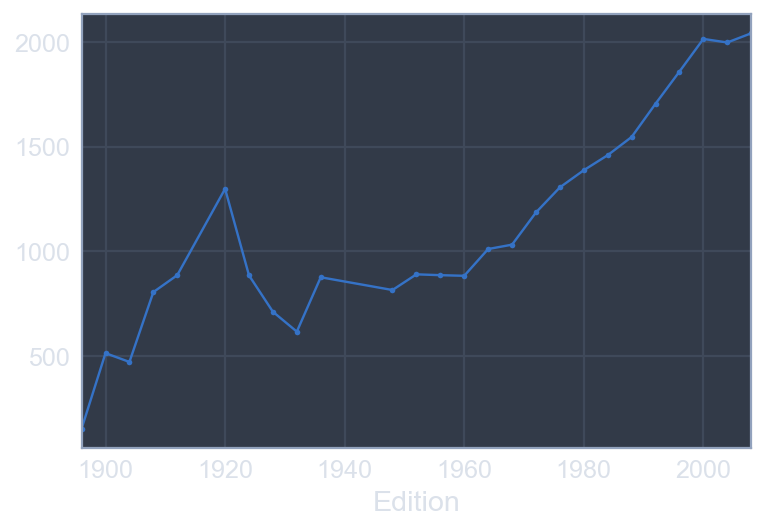

In [194]:
all_medals.plot(kind='line', marker='.')
plt.show()

### Grouping the data

In [195]:
france = medals.NOC == 'FRA' # Boolean Series for France

france_grps = medals[france].groupby(['Edition', 'Medal'])

france_grps['Athlete'].count().head(10)

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
         Silver    86
1908     Bronze    21
         Gold       9
         Silver     5
1912     Bronze     5
Name: Athlete, dtype: int64

### Reshaping the data

In [196]:
france_medals = france_grps['Athlete'].count().unstack()

france_medals.head(12) # Single level index

Medal,Bronze,Gold,Silver
Edition,,,
1896,2.0,5.0,4.0
1900,53.0,46.0,86.0
1908,21.0,9.0,5.0
1912,5.0,10.0,10.0
1920,55.0,13.0,73.0
1924,20.0,39.0,63.0
1928,13.0,7.0,16.0
1932,6.0,23.0,8.0
1936,18.0,12.0,13.0


### Plotting the result

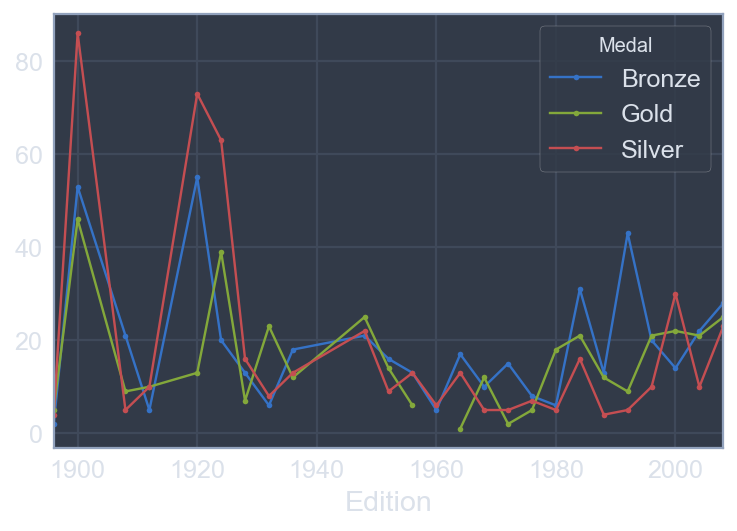

In [197]:
france_medals.plot(kind='line', marker='.')
plt.show()

### №54 Visualizing USA Medal Counts by Edition: Line Plot

* Create a DataFrame `usa` with data only for the USA
* Group `usa` such that `['Edition', 'Medal']` is the index. Aggregate the count over `'Athlete'`
* Use `.unstack()` with `level='Medal'` to reshape the DataFrame `usa_medals_by_year`
* Construct a line plot from the final DataFrame `usa_medals_by_year`

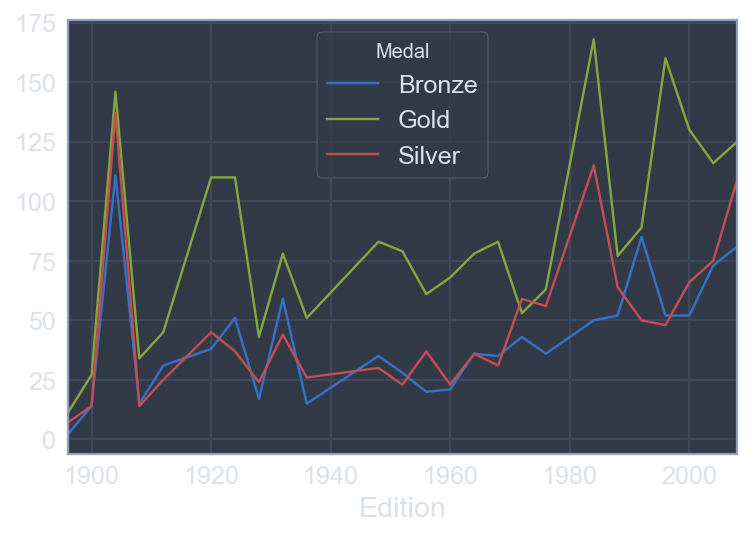

In [198]:
usa = medals[medals.NOC == 'USA']

usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

usa_medals_by_year.plot()
plt.show()

### №55 Visualizing USA Medal Counts by Edition: Area Plot

* Create an area plot of ]usa_medals_by_year]. This can be done by using ].plot.area()]

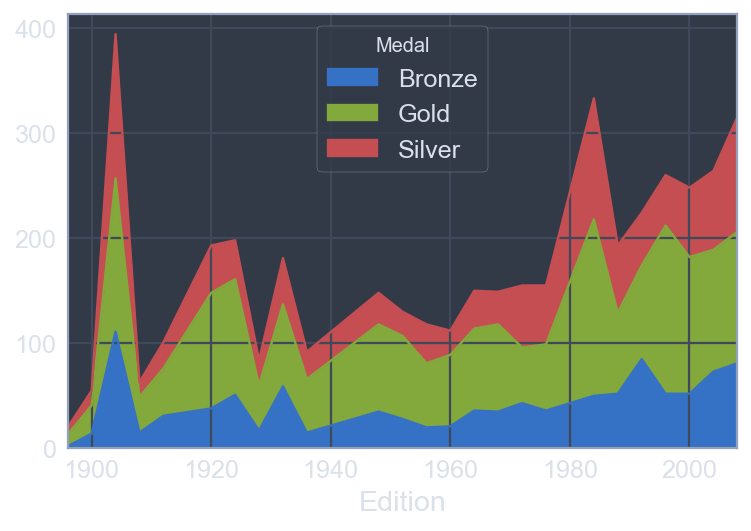

In [199]:
usa_medals_by_year.plot.area()
plt.show()

### №56 Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

* Redefine the `'Medal'` column of the DataFrame `medals` as an ordered categorical. To do this, use `pd.Categorical()` with three keyword arguments:
    * `values = medals.Medal`
    * `categories=['Bronze', 'Silver', 'Gold']`
    * `ordered=True`
After this, you can verify that the type has changed using `medals.info()`
Plot the final DataFrame `usa_medals_by_year` as an area plot

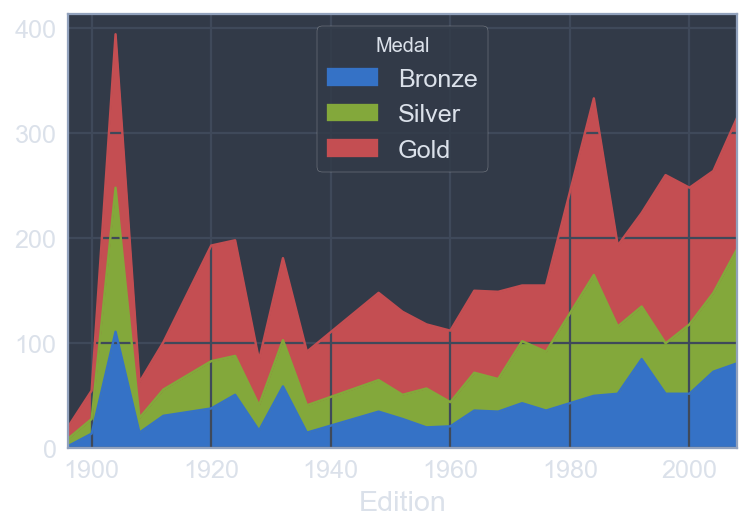

In [200]:
medals.Medal = pd.Categorical(values = medals.Medal,
                              categories=['Bronze', 'Silver', 'Gold'],
                              ordered=True)

usa = medals[medals.NOC == 'USA']

usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

usa_medals_by_year.plot.area()
plt.show()